In [1]:
import torch
from torch_geometric.data import Data
import networkx as nx
from torch_geometric.utils.convert import to_networkx
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from karateclub import Node2Vec

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# This part allows the graph to be drawn
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

Number of nodes 34


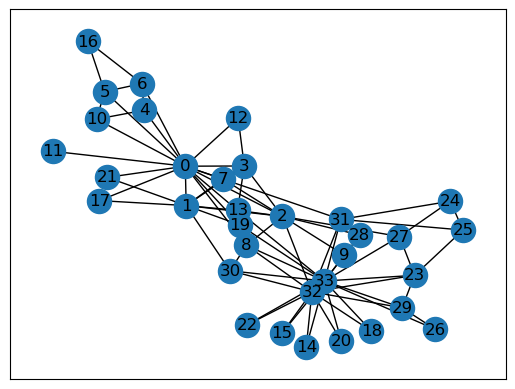

In [2]:
G = nx.karate_club_graph() # load the Zachary's karate club graph
print(f"Number of nodes {len(G.nodes)}")
nx.draw_networkx(G)

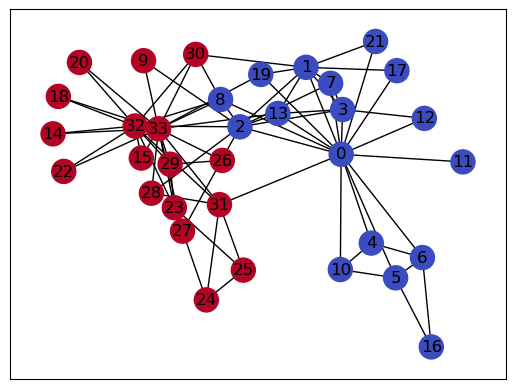

In [3]:
# Plot the graph with labels
label = []
for i in G.nodes:
    club_names = G.nodes[i]['club']
    label.append(1 if club_names=="Officer" else 0)

layout_pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=layout_pos, node_color=label, cmap="coolwarm")

In [4]:
# Perform node embedding using Node2Vec
Node2Vec_model = Node2Vec(
    walk_number=10,
    walk_length=80,
    p=0.9, # probability of staying in local neighborhood
    q=0.1, # probability of exploring other neighborhoods
    dimensions=124
) # Bad biased to stay near node

Node2Vec_model.fit(G)

In [5]:
embedding = Node2Vec_model.get_embedding()
embedding.shape # nodes x features --> 34 x 124

(34, 124)

(34, 2)


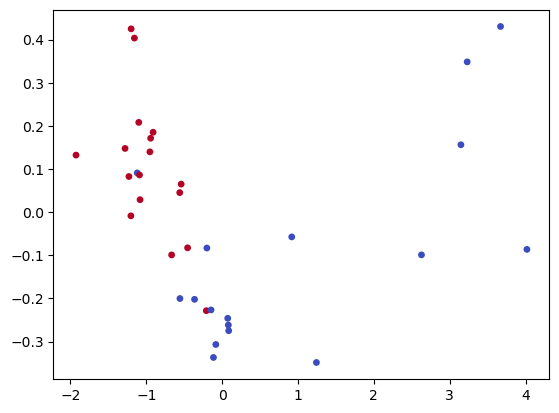

In [6]:
# Low dimensional plot of the nodes x features

PCA_model = PCA(n_components=2)
lowdimension_embedding = PCA_model.fit_transform(embedding)
print(lowdimension_embedding.shape) # nodes x features --> 34 x 2

plt.scatter(
    lowdimension_embedding[:,0], lowdimension_embedding[:,1],
    c=label, s=15, cmap="coolwarm")

In [7]:
# Node classification using embedded model

X_train, X_test, y_train, y_test = train_test_split(embedding, label, test_size=0.3)

model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_acc = roc_auc_score(y_test, y_predict)
print(f"AUC: {model_acc}")

AUC: 0.9
